In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
X = np.loadtxt("x.txt")
X = X.reshape(-1,1)
y = np.loadtxt("y.txt")
y = y.astype(np.int_)

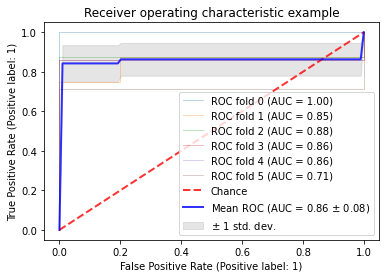

In [3]:
random_state = np.random.RandomState(10)
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [16]:
y_pred = classifier.predict(X)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(accuracy, precision, recall, f1)

0.868421052631579 0.972972972972973 0.8 0.8780487804878049


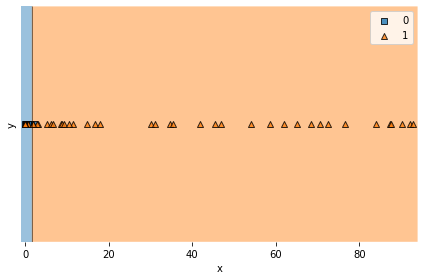

In [17]:
plot_decision_regions(X,y,clf=classifier,legend=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [18]:
x = [[0.3]]
classifier.predict(x)

array([0])

In [19]:
x = [[0.5]]
classifier.predict(x)

array([0])

In [20]:
x = [[1]]
classifier.predict(x)

array([0])

In [21]:
x = [[1.2]]
classifier.predict(x)

array([0])

In [22]:
x = [[1.4]]
classifier.predict(x)

array([0])

In [23]:
x = [[1.45]]
classifier.predict(x)

array([0])

In [24]:
x = [[1.5]]
classifier.predict(x)

array([1])

In [25]:
x = [[2]]
classifier.predict(x)

array([1])